# <span style="color:red"> Laboratorio di Simulazione Numerica (LSN) </span>
## <span style="color:green"> Esercitazione Numerica #02</span>

All'interno della seconda lezione numerica abbiamo avuto modo di introdurre due concetti molto importanti all'interno del corso: 

1. Campionamento Rilevante (**Importance Sampling**);
2. Moto Randomico in 3 dimensioni (**Random Walk 3D**).

Il primo rappresenta un'evoluzione delle tecniche di campionamento Monte Carlo in quanto, come abbiamo potuto verificare durante l'esercitazione, permette di aumentarne l'efficienza e la precisione. Il secondo punto invece, rappresenta il primo e più semplice esempio di processo stocastico di Markov, definito come una successione di variabili casuali indicizzate con parametro temporale, che non conserva memoria dei passi precedenti, $i.e.$ lo stato successivo del processo dipende esclusivamente da quello attuale.

### <span style="color:darkorange"> Esercizio 02.1</span>

Il primo esercizio consisteva per l'appunto nell'implementazione di un metodo di campionamento rilevante al fine di stimare il valore del seguente integrale, per il quale viene riportato anche il valore esatto calcolato analiticamente.

$$I = \int_0^1 \frac{\pi}{2}\cos \left( \frac{x}{2} \pi \right) dx = 1$$

Durante la lezione abbiamo infatti visto che, attraverso tecniche Monte Carlo, diventa possibile calcolare il valore di un integrale semplicemente andando a campionare variabili secondo particolari distribuzioni di probabilità. Supponiamo ad esempio di voler stimare il valore del seguente integrale scritto in forma generica.

$$I = \int_a^b f(x) dx = \int_a^b \left[ \frac{f(x)}{p(x)} \right] p(x) dx$$

dove nell'ultimo passaggio abbiamo moltiplicato e diviso per la funzione $p(x)$, una distribuzione di probabilità correttamente normalizzata che supponiamo di saper campionare tramite metodi MC. In questo modo il calcolo dell'integrale si riduce ad una stima del valor medio statistico.

$$\langle I \rangle = \lim_{N \to \infty} \frac{1}{N}\sum_{i=1}^N \frac{f(x_i)}{p(x_i)}$$

dove le $x_i$ sono variabili estratte secondo la distribuzione di probabilità $p(x)$. Chiaramente una possibile scelta, seppur banale, consiste nel fissare una distribuzione di probabilità uniforme descritta, a meno di normalizzazione, da una funzione $p(x)$ costante. Tuttavia, un caso ben più interessante, si ottiene applicando il cosiddetto campionamento rilevante. Esso consiste nell'utilizzo di una distribuzione $p(x)$ che approssima a grandi linee l'andamento della funzione integranda di partenza. In questo modo, come vedremo in seguito, è possibile ottimizzare l'efficienza dell'algoritmo abbassando l'incertezza statistica del risultato.

Durante l'esercitazione, abbiamo quindi calcolato via metodi Monte Carlo, l'integrale riportato sopra, utilizzando sia un campionamento uniforme, sia un campionamento rilevante. In particolare, per quest'ultimo, ho deciso di utilizzare una distribuzione di probabilità lineare costruita in modo da coincidere, a meno del fattore di normalizzazione, con la funzione integranda di partenza in corrispondenza degli estremi del dominio, $i.e. p(x)=ax+b$ (con $a=-2$ e $b=2$). Il motivo della scelta di una siffatta distribuzione risiede principalmente nella possibilità di poter applicare il metodo dell'inversione della cumulativa per campionare le mie variabili $x$ attarverso la formula seguente.

$$x = 1 - \sqrt{1-t}$$

dove $t$ è una variabile estratta uniformemente dall'intervallo $[0,1)$. Lo script di Python sottostante riporta, per i due metodi di campionamento scelti (uniforme e rilevante), l'andamento di media e incertezza statistica (calcolate sempre col metodo a blocchi) in funzione del numero di blocchi utilizzati durante simulazione. In particolare, per entrambe le distribuzioni, si è generato un campione di $M=10^4$ variabili $x_i$, equipartite all'interno di $N=100$ blocchi.

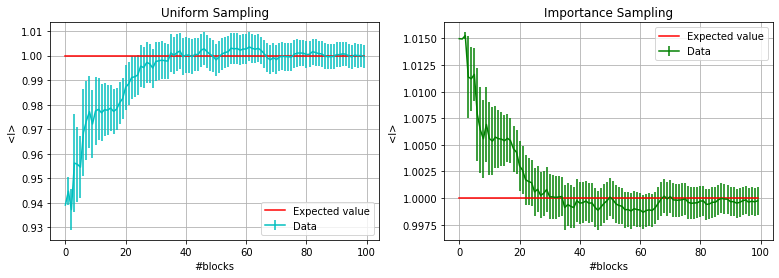

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

nblocks = 100
x = np.arange(nblocks)
real = np.zeros(nblocks)

uni,err_uni = np.loadtxt("Esercizio2.1/uniform.txt", usecols=(0,1), delimiter=' ', unpack='true')
imp,err_imp = np.loadtxt("Esercizio2.1/importance.txt", usecols=(0,1), delimiter=' ', unpack='true')

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.errorbar(x,uni,err_uni,color='c',label='Data')
plt.xlabel('#blocks')
plt.ylabel('<I>')
plt.title('Uniform Sampling')
plt.grid(True)
plt.plot(x,real+1,color='r',label='Expected value')
plt.legend()

plt.subplot(132)
plt.errorbar(x,imp,err_imp,color='g',label='Data')
plt.xlabel('#blocks')
plt.ylabel('<I>')
plt.title('Importance Sampling')
plt.grid(True)
plt.plot(x,real+1,color='r',label='Expected value')
plt.legend()

plt.show()

Come si osserva dai plot sopra riportati, entrambe le medie calcolate con il Block Method convergono al risultato atteso dopo un numero relativamente piccolo di blocchi ($N_{blk} \geq 40$). Un altro comportamento molto interessante su cui voglio porre l'attenzione riguarda l'ordine di grandezza dell'incertezza statistica nei due casi. Si può infatti notare che, come già preannunciato, l'errore calcolato con Importance Sampling tende ad essere molto più piccolo (di quasi un'ordine di grandezza) rispetto a quello ottenuto con campionamento uniforme. Ciò è dovuto fondamentalmente al fatto che la distribuzione di probabilità lineare campionata appare più simile all'integranda di partenza rispetto ad una distribuzione uniforme (i.e. una funzione costante). Infatti, nel caso limite in cui si suppone di saper campionare esattamente la funzione di partenza $f(x)$ e di conoscere il risultato analitico dell'integrale $I$, sarebbe possibile a priori, fissando $p(x) = \frac{f(x)}{I}$, ottenere tramite metodi MC una stima dell'integrale caratterizzata da una varianza pari a zero, e quindi assenza di fluttuazioni attorno al valor medio. Ovviamente questo rappresenta un caso particolarmente irrealistico, tuttavia ci permette di comprendere il motivo per cui la scelta si distribuzioni di probabilità *'simili'* all'integranda comportino una dimimuzione delle fluttuazioni e quindi dell'incertezza statistica.

### <span style="color:darkorange"> Esercizio 02.2</span>

Nel secondo esercizio abbiamo introdotto il concetto di processo stocastico, in particolare di processo di Markov, per simulare un Random Walk 3D all'interno di un reticolo cubico e nel continuo. Nel primo caso abbiamo considerato un reticolo cubico con spigoli paralleli agli assi coordinati $x$,$y$ e $z$ e passo reticolare $a=1$, di modo che, ad ogni step, fossero possibili solamente sei direzioni, ovvero due per ogni asse, tutte equiprobabili. Per implementare ciò è bastato riciclare la distribuzione di probabilità uniforme a valori interi già utilizzato per simulare il lancio di un dado standard, questa volta, associando ad ognuno dei sei possibili risultati una direzione all'interno del reticolo. Nel secondo caso la lunghezza di ogni passo era sempre fissata e pari ad $a=1$, tuttavia questa volta la direzione di propagazione ad ogni step veniva estratta campionando uniformemente l'angolo solido (e quindi gli angoli $\theta$ e $\phi$), attraverso le seguenti formule:

$$\begin{cases} \theta = \arccos (1-2s) \\ \phi = 2\pi t \end{cases}$$

dove $s$ e $t$ sono due variabili estratte uniformemente dall'intervallo $[0,1)$. In entrambi i casi, si è simulato un numero $M=10^4$ di Random Walk, ognuno dei quali costituito da $N_{step}=100$ step e si è fissata l'origine come punto di partenza di ogni propagazione. Da questo campione di dati è stato possibile calcolare $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ con rispettiva incertezza statistica, e studiare il suo andamento in funzione del numero di step. Inoltre, per verificare l'effettivo carattere diffusivo del processo ho fittato la curva ottenuta con una funzione del tipo $f(N)=k\sqrt{N}$ (dove $N$ rappresenta il numero di step).

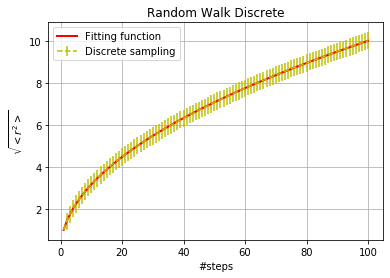

Fitting function:
 Optimized parameter [k] = [0.9992948]
 Parameter uncertainty = [6.73616636e-05]


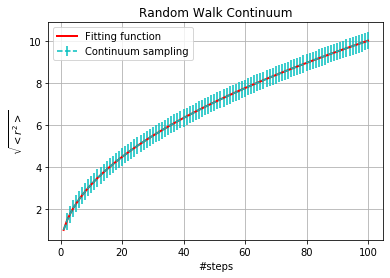

Fitting function:
 Optimized parameter [k] = [1.00035091]
 Parameter uncertainty = [4.68483878e-05]


In [3]:
from scipy.optimize import curve_fit

def f(x,k):  # defining the fitting function
    return k * np.sqrt(x)

nsteps = 100

x = np.arange(nsteps)
dis,err_dis = np.loadtxt("Esercizio2.2/discrete.txt", usecols=(0,1), delimiter=' ', unpack='true')
con,err_con = np.loadtxt("Esercizio2.2/continuum.txt", usecols=(0,1), delimiter=' ', unpack='true')

plt.errorbar(x+1,dis,err_dis,color='y',linestyle='dashed',label='Discrete sampling')
plt.xlabel('#steps')
plt.ylabel('$\sqrt{<r^2>}$')
plt.title('Random Walk Discrete')
plt.grid(True)

p_opt, p_cov = curve_fit(f, x+1, dis, bounds=([0],[5]))
y_fit = f(x+1,p_opt[0])
plt.plot(x+1,y_fit,color='r',linewidth=2,label='Fitting function')
plt.legend()
plt.show()

print("Fitting function:")
print(" Optimized parameter [k] = "+str(p_opt))
print(" Parameter uncertainty = "+str(np.sqrt(np.diagonal(p_cov))))

plt.figure()
plt.errorbar(x+1,con,err_con,color='c',linestyle='dashed',label='Continuum sampling')
plt.xlabel('#steps')
plt.ylabel('$\sqrt{<r^2>}$')
plt.title('Random Walk Continuum')
plt.grid(True)

p_opt, p_cov = curve_fit(f, x+1, con, bounds=([0],[5]))
y_fit = f(x+1,p_opt[0])
plt.plot(x+1,y_fit,color='r',linewidth=2,label='Fitting function')
plt.legend()
plt.show()

print("Fitting function:")
print(" Optimized parameter [k] = "+str(p_opt))
print(" Parameter uncertainty = "+str(np.sqrt(np.diagonal(p_cov))))

Come si osserva dai grafici riportati all'interno dello specchietto Python, la curva ottenuta è descritta con ottima precisione dalla funzione scelta per il fit. Prima di concludere però, è importante giustificare perchè un andamento di questo tipo può essere associato ad un processo di carattere diffusivo. Ricordiamo innanzitutto che esiste un legame stretto tra il CTL e l'equazione di diffusione associata ad un RW. In particolare, sappiamo che per un generico Random Walk 3D, costituito da $N$ passi di lunghezza $a$, valgono le due seguenti relazioni:

$$\langle \vec{r_N} \rangle = 0$$

$$\sigma_N^2 = Na^2$$

Tuttavia, per definizione di varianza, si ha

$$\sigma_N^2 = \langle |\vec{r_N}|^2 \rangle - (\langle \vec{r_N} \rangle)^2 = \langle |\vec{r_N}|^2 \rangle$$

Vediamo quindi che necessariamente un processo diffusivo dovrà essere caratterizzato da un andamento di $\sqrt{\langle |\vec{r}_N|^2 \rangle}$ proporzionale $\sqrt{N}$. In particolare il fattore di proporzionalità dovrà coincidere con la lunghezza del passo ad ogni step ($i.e.$ $a=1$), in perfetto accordo con il valore di $k$ ricavato fittando i risultati ottenuti dalla simulazione di questo processo stocastico.